In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import requests

import time

`GET` https://statsapi.web.nhl.com/api/v1/draft Get round-by-round data for current year's NHL Entry Draft.<br>
`GET` https://statsapi.web.nhl.com/api/v1/draft/YEAR Takes a YYYY format year and returns draft data

In [3]:
# Create url for API call.
rounds = []
years = []
overall_picks = []
teams = []
team_ids = []
team_links = []
prospects = []
prospect_ids = []
prospect_links = []
count = 1

for year in range(1963, 2022):
    res = requests.get('https://statsapi.web.nhl.com/api/v1/draft/{}'.format(year))
    
    for round_ in res.json()['drafts'][0]['rounds']:
        for pick in round_['picks']:
            rounds.append(pick['round'])
            years.append(pick['year'])
            overall_picks.append(pick['pickOverall'])
            teams.append(pick['team']['name'])
            team_ids.append(pick['team']['id'])
            team_links.append(pick['team']['link'])
            prospects.append(pick['prospect']['fullName'])
            try:
                prospect_ids.append(pick['prospect']['id'])
            except:
                prospect_ids.append('NA')
            prospect_links.append(pick['prospect']['link'])
#             print(count)
#             count += 1
            
#         time.sleep(2)
        
#     time.sleep(2)

In [4]:
drafts_df = pd.DataFrame({'year': years,
              'draft_round': rounds,
              'overall_pick': overall_picks,
              'player': prospects,
              'player_id': prospect_ids,
              'player_link': prospect_links,
              'team': teams,
              'team_id': team_ids,
              'team_link': team_links})


drafts_df

,year,draft_round,overall_pick,player,player_id,player_link,team,team_id,team_link
0,1963,1,1,Garry Monahan,NA,/api/v1/draft/prospects/null,Montréal Canadiens,8,/api/v1/teams/8
1,1963,1,2,Peter Mahovlich,NA,/api/v1/draft/prospects/null,Detroit Red Wings,17,/api/v1/teams/17
2,1963,1,3,Orest Romashyna,NA,/api/v1/draft/prospects/null,Boston Bruins,6,/api/v1/teams/6
3,1963,1,4,Al Osborne,NA,/api/v1/draft/prospects/null,New York Rangers,3,/api/v1/teams/3
4,1963,1,5,Art Hampson,NA,/api/v1/draft/prospects/null,Chicago Blackhawks,16,/api/v1/teams/16
...,...,...,...,...,...,...,...,...,...
12024,2021,7,220,Taylor Makar,84198,/api/v1/draft/prospects/84198,Colorado Avalanche,21,/api/v1/teams/21
12025,2021,7,221,Tomas Machu,86612,/api/v1/draft/prospects/86612,New York Islanders,2,/api/v1/teams/2
12026,2021,7,222,Carl Lindbom,87125,/api/v1/draft/prospects/87125,Vegas Golden Knights,54,/api/v1/teams/54
12027,2021,7,223,Samuel Lipkin,88850,/api/v1/draft/prospects/88850,Arizona Coyotes,53,/api/v1/teams/53


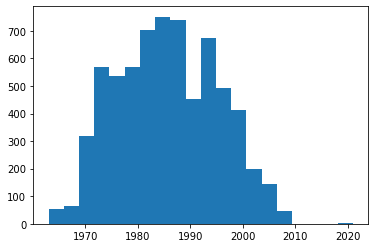

In [5]:
plt.hist(drafts_df[drafts_df['player_id'] == 'NA']['year'], bins=20);

In [10]:
len(drafts_df)

12029

In [23]:
na_ids = drafts_df[drafts_df["player_id"] == 'NA']
na_ids.sort_values('year', ascending=False).head(30)

,year,draft_round,overall_pick,player,player_id,player_link,team,team_id,team_link
11815,2021,1,11,Void,NA,/api/v1/draft/prospects/null,Arizona Coyotes,53,/api/v1/teams/53
11636,2020,2,49,Void,NA,/api/v1/draft/prospects/null,Arizona Coyotes,53,/api/v1/teams/53
10464,2014,6,160,Pontus Sjalin,NA,/api/v1/draft/prospects/null,Minnesota Wild,30,/api/v1/teams/30
9740,2011,3,69,,NA,/api/v1/draft/prospects/null,New Jersey Devils,1,/api/v1/teams/1
9322,2009,3,71,Troy Hesketh,NA,/api/v1/draft/prospects/null,Edmonton Oilers,22,/api/v1/teams/22
9199,2008,6,159,Brett Hextall,NA,/api/v1/draft/prospects/null,Phoenix Coyotes,27,/api/v1/teams/27
9072,2008,2,32,Slava Voynov,NA,/api/v1/draft/prospects/null,Los Angeles Kings,26,/api/v1/teams/26
9114,2008,3,74,Andrew Campbell,NA,/api/v1/draft/prospects/null,Los Angeles Kings,26,/api/v1/teams/26
9179,2008,5,139,Mark Borowiecki,NA,/api/v1/draft/prospects/null,Ottawa Senators,9,/api/v1/teams/9
9188,2008,5,148,Matt Martin,NA,/api/v1/draft/prospects/null,New York Islanders,2,/api/v1/teams/2


In [7]:
ids = [i for i in drafts_df["player_id"] if i != 'NA']
max(ids)

92041